# **Create a Resume from profile description Using GenAI**

## **Introduction**
In this notebook, we'll learn to create a simple Resume using GenAI. We will be using the open ai (gpt-3.5-turbo) model for this example.

In [51]:
!pip install openai

### **Get open AI key**


**Retrieves the OpenAI API key from the environment variables in Google Colab.  API key is required to authenticate and access OpenAI's services.**

In [52]:
from google.colab import userdata
open_ai_key = userdata.get('OPEN_AI_KEY')

## **Prompts**


**User Prompt**: This is input provided by the user to start a conversation or task. It gives the AI context on what the user wants.

**System Prompt**: This provides additional guidance or constraints to the AI alongside the user prompt, helping to shape the output in a more specific way.

### **System Prompts**


In [53]:
system_prompt_1 = "You are a career assistant skilled in creating resume with description of a person."

In [54]:
system_prompt_2 = """
You are helful career assistant. Generate a professional resume based on user information in proper format.
Use details such as contact information, profile summary, education with relevant coursework, work experience, skills, certifications, and any other relevant information that user provides.
"""


### **User Prompts**

In [55]:
user_prompt = """
I'm Ram, a final year student at XYZ College pursuing a degree in Computer Engineering.
My passion lies in web development, where I specialize in utilizing technologies like Reactjs, Nextjs, Typescript, and Python Django.
Alongside, I am also familiar with machine learning, cybersecurity, and Linux systems.

Throughout my college journey, I've undertaken some exciting projects, including an E-commerce website developed with React, Django, and Postgresql,
and a Netflix clone built using Nextjs and Typescript.
Additionally, I've gained valuable experience during my 3-month internship at ABC company, where I worked as a React developer.

As I approach graduation, I'm eager to leverage my skills and experiences to contribute meaningfully to the tech industry.
"""

###**Tokenization**
When processing input text, OpenAI's models tokenize the text into smaller units, typically subwords or characters.


[https://platform.openai.com/tokenizer](https://platform.openai.com/tokenizer)

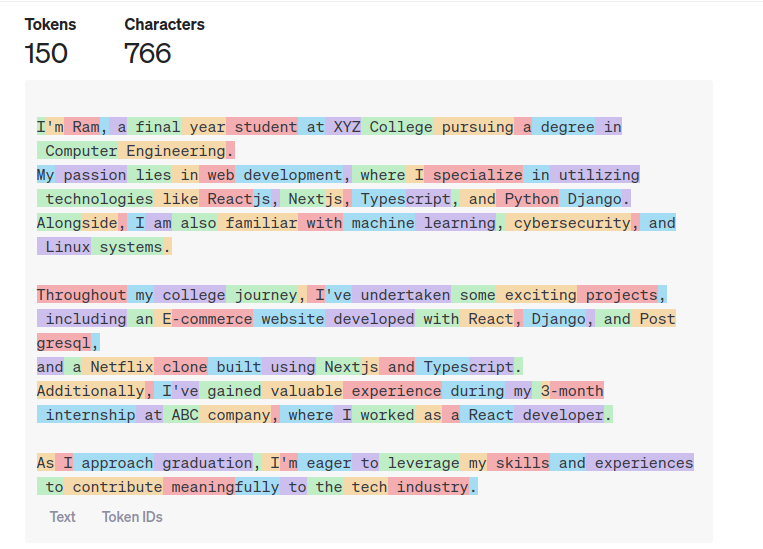

In [56]:
!pip install tiktoken


In [57]:
import tiktoken
encoding = tiktoken.get_encoding("cl100k_base")
num_tokens = len(encoding.encode(user_prompt))
print(num_tokens)

150


In [58]:
from openai import OpenAI
client = OpenAI(api_key=open_ai_key)


In [59]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": system_prompt_1},
    {"role": "user", "content": user_prompt}
  ]
)

resume = completion.choices[0].message.content
print(resume)

**Resume**

---

**Name:** Ram

**Education:** Final year student at XYZ College

**Degree:** Pursuing a degree in Computer Engineering

---

**Technical Skills:**

- **Web Development:** Reactjs, Nextjs, Typescript, Python Django
- **Other Skills:** Machine Learning, Cybersecurity, Linux Systems

**Projects:**

1. E-commerce Website:
   - Developed using React, Django, and Postgresql

2. Netflix Clone:
   - Built with Nextjs and Typescript

**Experience:**
- **ABC Company** (Internship):
  - Position: React Developer
  - Duration: 3 months

---

**About:**
Ram is a final year student at XYZ College with a strong passion for web development. His expertise lies in utilizing technologies like Reactjs, Nextjs, Typescript, and Python Django. Alongside, he has knowledge in machine learning, cybersecurity, and Linux systems.

During his college journey, Ram has completed projects such as an E-commerce website developed with React, Django, and Postgresql and a Netflix clone built using Nextjs